<a href="https://colab.research.google.com/github/moriomchi/AIProject/blob/main/Copy_of_EfficientNetLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras opencv-python librosa
#installing necessary libraries (TensorFlow, Keras for building models, OpenCV for image processing, Librosa for audio processing)

In [ ]:
#installing the kaggle API and downloading the dataset:
!pip install kaggle
from google.colab import files
files.upload()  # Upload your kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c deepfake-detection-challenge


Saving kaggle.json to kaggle.json
100% 4.13G/4.13G [02:17<00:00, 34.4MB/s]
100% 4.13G/4.13G [02:17<00:00, 32.2MB/s]


In [ ]:
#checking that the kaggle API is installed:
!pip install kaggle


In [ ]:
#setting up kaggle API credentials
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle/"


In [ ]:
#unzipping the dataset:
!unzip deepfake-detection-challenge.zip


Archive:  deepfake-detection-challenge.zip
  inflating: sample_submission.csv   
  inflating: test_videos/aassnaulhq.mp4  
  inflating: test_videos/aayfryxljh.mp4  
  inflating: test_videos/acazlolrpz.mp4  
  inflating: test_videos/adohdulfwb.mp4  
  inflating: test_videos/ahjnxtiamx.mp4  
  inflating: test_videos/ajiyrjfyzp.mp4  
  inflating: test_videos/aktnlyqpah.mp4  
  inflating: test_videos/alrtntfxtd.mp4  
  inflating: test_videos/aomqqjipcp.mp4  
  inflating: test_videos/apedduehoy.mp4  
  inflating: test_videos/apvzjkvnwn.mp4  
  inflating: test_videos/aqrsylrzgi.mp4  
  inflating: test_videos/axfhbpkdlc.mp4  
  inflating: test_videos/ayipraspbn.mp4  
  inflating: test_videos/bcbqxhziqz.mp4  
  inflating: test_videos/bcvheslzrq.mp4  
  inflating: test_videos/bdshuoldwx.mp4  
  inflating: test_videos/bfdopzvxbi.mp4  
  inflating: test_videos/bfjsthfhbd.mp4  
  inflating: test_videos/bjyaxvggle.mp4  
  inflating: test_videos/bkcyglmfci.mp4  
  inflating: test_videos/bktkwbcawi.m

In [ ]:

import os

# List the contents of the current directory
os.listdir()


['.config',
 'sample_submission.csv',
 'test_videos',
 'kaggle.json',
 'train_sample_videos',
 'deepfake-detection-challenge.zip',
 'sample_data']

In [ ]:
# List the contents of the train_sample_videos folder
train_videos = os.listdir('train_sample_videos')
print(train_videos)


['dbzpcjntve.mp4', 'bilnggbxgu.mp4', 'cnilkgvfei.mp4', 'aknbdpmgua.mp4', 'cdyakrxkia.mp4', 'eprybmbpba.mp4', 'dzieklokdr.mp4', 'bjkmjilrxp.mp4', 'chzieimrwu.mp4', 'apgjqzkoma.mp4', 'eukvucdetx.mp4', 'acxnxvbsxk.mp4', 'etdcqxabww.mp4', 'ctpqeykqdp.mp4', 'dqswpjoepo.mp4', 'degpbqvcay.mp4', 'dnyvfblxpm.mp4', 'dsgpbgsrdm.mp4', 'dcuiiorugd.mp4', 'dcamvmuors.mp4', 'bnjcdrfuov.mp4', 'avssvvsdhz.mp4', 'ecwaxgutkc.mp4', 'dakiztgtnw.mp4', 'amowujxmzc.mp4', 'bsfmwclnqy.mp4', 'axntxmycwd.mp4', 'eejswgycjc.mp4', 'czmqpxrqoh.mp4', 'bweezhfpzp.mp4', 'dlpoieqvfb.mp4', 'dhxctgyoqj.mp4', 'dtbpmdqvao.mp4', 'bwipwzzxxu.mp4', 'bahdpoesir.mp4', 'axwgcsyphv.mp4', 'brvqtabyxj.mp4', 'czfunozvwp.mp4', 'bgaogsjehq.mp4', 'ehccixxzoe.mp4', 'bguwlyazau.mp4', 'aettqgevhz.mp4', 'dgzklxjmix.mp4', 'dxuplhwvig.mp4', 'dfbpceeaox.mp4', 'ehtdtkmmli.mp4', 'doanjploai.mp4', 'cbbibzcoih.mp4', 'augtsuxpzc.mp4', 'bggsurpgpr.mp4', 'bgwmmujlmc.mp4', 'byijojkdba.mp4', 'ayqvfdhslr.mp4', 'cksanfsjhc.mp4', 'btunxncpjh.mp4', 'bmehkyan

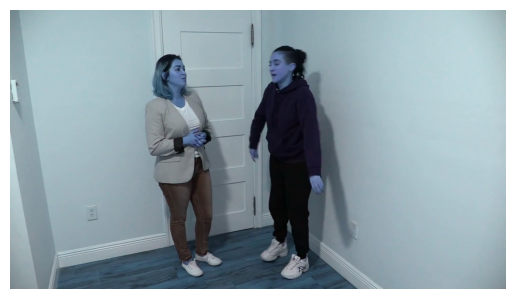

Total frames loaded: 300


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Function to load video frames
def load_video(file_path):
    #using cv2 to capture or read given video data
    cap = cv2.VideoCapture(file_path)

    #checking if the video opened correctly:
    if not cap.isOpened():
      print(f"Error: Could not open video {file_path}")
      return []

    #list to store the frames of the video:
    frames = []
    while True:
        ret, frame = cap.read() #reading a frame from the video
        if not ret: #if end of video reached, break
            break
        frames.append(frame) #add the frame to the list
    cap.release() #releasing video capture object
    return frames #returning list of frames

# Testing the function with a video:
base_path = '/content/train_sample_videos/'  # Base path for the videos
video_path = os.path.join(base_path, "bgmlwsoamc.mp4")  # Complete path
frames = load_video(video_path)  # Loading frames from the video



# Display the first frame
plt.imshow(frames[0])
plt.axis('off')  # Turn off axis numbers and ticks which are default in Matplotlib
plt.show() #displaying video frame

#printing total number of frames loaded
print(f"Total frames loaded: {len(frames)}")



In [ ]:
!pip install moviepy  # Installing moviepy to extract audio

from moviepy.editor import VideoFileClip

video_path = "/content/train_sample_videos/bgmlwsoamc.mp4"
video = VideoFileClip(video_path)
audio_path = "/content/train_sample_videos/bgmlwsoamc_audio.wav"  # Path to save extracted audio
video.audio.write_audiofile(audio_path)  # Extract and save audio



  if event.key is 'enter':



MoviePy - Writing audio in /content/train_sample_videos/bgmlwsoamc_audio.wav


MoviePy - Done.


In [ ]:
#loading the extracted audio:
import librosa
audio, sample_rate = librosa.load(audio_path, sr=None)

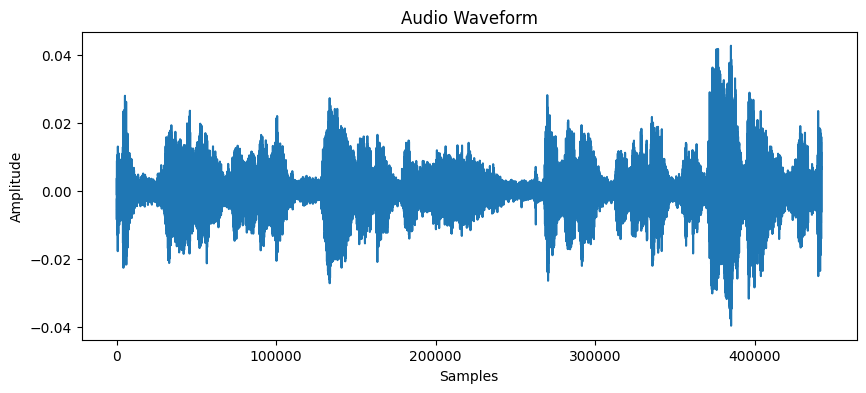

In [ ]:
#visulizing the audio using waveform:

# Plot the audio waveform
plt.figure(figsize=(10, 4))
plt.plot(audio)
plt.title("Audio Waveform")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()


In [ ]:
#extracting audio feature MFCC
mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)

Steps:
1. Data Preparation

Organize your file paths for efficient data loading.
Create functions to read video and audio files.

2. Feature Extraction

Video Features: Extract spatial features using EfficientNet for each video frame.
Audio Features: Extract MFCCs and other features from audio using librosa.

3. Data Processing

Normalization: Scale or normalize the features (e.g., divide pixel values by 255 for images).
Padding: Ensure consistency in sequence lengths (e.g., pad or truncate frames and audio sequences).
Formatting: Prepare data in tensors suitable for your model (e.g., CNN-RNN format).

4. Model Training and Evaluation

Use the processed data to train and test your model.


In [ ]:
!pip install tensorflow


In [ ]:
#preprocessing and normalizing videos:
import cv2
import numpy as np

# Listing video files:
video_files = ['dbzpcjntve.mp4', 'bilnggbxgu.mp4', 'cnilkgvfei.mp4', 'aknbdpmgua.mp4', 'cdyakrxkia.mp4', 'eprybmbpba.mp4', 'dzieklokdr.mp4', 'bjkmjilrxp.mp4', 'chzieimrwu.mp4', 'apgjqzkoma.mp4', 'eukvucdetx.mp4', 'acxnxvbsxk.mp4', 'etdcqxabww.mp4', 'ctpqeykqdp.mp4', 'dqswpjoepo.mp4', 'degpbqvcay.mp4', 'dnyvfblxpm.mp4', 'dsgpbgsrdm.mp4', 'dcuiiorugd.mp4', 'dcamvmuors.mp4', 'bnjcdrfuov.mp4', 'avssvvsdhz.mp4', 'ecwaxgutkc.mp4', 'dakiztgtnw.mp4', 'amowujxmzc.mp4', 'bsfmwclnqy.mp4', 'axntxmycwd.mp4', 'eejswgycjc.mp4', 'czmqpxrqoh.mp4', 'bweezhfpzp.mp4', 'dlpoieqvfb.mp4', 'dhxctgyoqj.mp4', 'dtbpmdqvao.mp4', 'bwipwzzxxu.mp4', 'bahdpoesir.mp4', 'axwgcsyphv.mp4', 'brvqtabyxj.mp4', 'czfunozvwp.mp4', 'bgaogsjehq.mp4', 'ehccixxzoe.mp4', 'bguwlyazau.mp4', 'aettqgevhz.mp4', 'dgzklxjmix.mp4', 'dxuplhwvig.mp4', 'dfbpceeaox.mp4', 'ehtdtkmmli.mp4', 'doanjploai.mp4', 'cbbibzcoih.mp4', 'augtsuxpzc.mp4', 'bggsurpgpr.mp4', 'bgwmmujlmc.mp4', 'byijojkdba.mp4', 'ayqvfdhslr.mp4', 'cksanfsjhc.mp4', 'btunxncpjh.mp4', 'bmehkyanbj.mp4', 'aevrfsexku.mp4', 'asdpeebotb.mp4', 'asaxgevnnp.mp4', 'crezycjqyk.mp4', 'bchnbulevv.mp4', 'aipfdnwpoo.mp4', 'dgmevclvzy.mp4', 'awhmfnnjih.mp4', 'eebserckhh.mp4', 'btugrnoton.mp4', 'dozyddhild.mp4', 'djvtbgwdcc.mp4', 'dkuayagnmc.mp4', 'dbzcqmxzaj.mp4', 'cvaksbpssm.mp4', 'ahfazfbntc.mp4', 'ejkqesyvam.mp4', 'clrycekyst.mp4', 'acqfdwsrhi.mp4', 'ajqslcypsw.mp4', 'dzvyfiarrq.mp4', 'acifjvzvpm.mp4', 'coadfnerlk.mp4', 'ahbweevwpv.mp4', 'dkrvorliqc.mp4', 'bgvhtpzknn.mp4', 'avnqydkqjj.mp4', 'ehfiekigla.mp4', 'bqtuuwzdtr.mp4', 'aslsvlvpth.mp4', 'eekozbeafq.mp4', 'etohcvnzbj.mp4', 'eebrkicpry.mp4', 'cxttmymlbn.mp4', 'aapnvogymq.mp4', 'dzwkmcwkwl.mp4', 'cwsbspfzck.mp4', 'byfenovjnf.mp4', 'cdphtzqrvp.mp4', 'curpwogllm.mp4', 'eudeqjhdfd.mp4', 'beyebyhrph.mp4', 'ceymbecxnj.mp4', 'acxwigylke.mp4', 'bntlodcfeg.mp4', 'cpjxareypw.mp4', 'bdnaqemxmr.mp4', 'cwwandrkus.mp4', 'dhevettufk.mp4', 'ehbnclaukr.mp4', 'emaalmsonj.mp4', 'efwfxwwlbw.mp4', 'duzuusuajr.mp4', 'bmjmjmbglm.mp4', 'bkmdzhfzfh.mp4', 'eqvuznuwsa.mp4', 'eixwxvxbbn.mp4', 'alninxcyhg.mp4', 'dvakowbgbt.mp4', 'cobjrlugvp.mp4', 'dulanfulol.mp4', 'aladcziidp.mp4', 'dboxtiehng.mp4', 'beboztfcme.mp4', 'avfitoutyn.mp4', 'byofowlkki.mp4', 'bvzjkezkms.mp4', 'eoewqcpbgt.mp4', 'cgvrgibpfo.mp4', 'dsndhujjjb.mp4', 'bpxckdzddv.mp4', 'eepezmygaq.mp4', 'cycacemkmt.mp4', 'dkdwxmtpuo.mp4', 'ciyoudyhly.mp4', 'bmjzrlszhi.mp4', 'cwrtyzndpx.mp4', 'cyxlcuyznd.mp4', 'dqnyszdong.mp4', 'dqzreruvje.mp4', 'blpchvmhxx.mp4', 'crzfebnfgb.mp4', 'cyclgfjdrv.mp4', 'blzydqdfem.mp4', 'crktehraph.mp4', 'adylbeequz.mp4', 'bhbdugnurr.mp4', 'dkhlttuvmx.mp4', 'aybumesmpk.mp4', 'deywhkarol.mp4', 'eqjscdagiv.mp4', 'ebkzwjgjhq.mp4', 'dptbnjnkdg.mp4', 'dhcndnuwta.mp4', 'bmhvktyiwp.mp4', 'azsmewqghg.mp4', 'abofeumbvv.mp4', 'bghphrsfxf.mp4', 'ddqccgmtka.mp4', 'bqnymlsayl.mp4', 'aelfnikyqj.mp4', 'aagfhgtpmv.mp4', 'abarnvbtwb.mp4', 'ebeknhudxq.mp4', 'duvyaxbzvp.mp4', 'dkzvdrzcnr.mp4', 'ecnihjlfyt.mp4', 'avvdgsennp.mp4', 'agrmhtjdlk.mp4', 'bwuwstvsbw.mp4', 'byqzyxifza.mp4', 'bwhlgysghg.mp4', 'abqwwspghj.mp4', 'cqhngvpgyi.mp4', 'diuzrpqjli.mp4', 'bqeiblbxtl.mp4', 'drsakwyvqv.mp4', 'clihsshdkq.mp4', 'dhoqofwoxa.mp4', 'ajwpjhrbcv.mp4', 'bdgipnyobr.mp4', 'cepxysienc.mp4', 'chviwxsfhg.mp4', 'avywawptfc.mp4', 'aufmsmnoye.mp4', 'ahdbuwqxit.mp4', 'dbhoxkblzx.mp4', 'bbvgxeczei.mp4', 'cfyduhpbps.mp4', 'bjsmaqefoi.mp4', 'dxbqjxrhin.mp4', 'ehdkmxgtxh.mp4', 'boovltmuwi.mp4', 'cferslmfwh.mp4', 'arkroixhey.mp4', 'chtapglbcj.mp4', 'ddepeddixj.mp4', 'dbnygxtwek.mp4', 'bejhvclboh.mp4', 'ckjaibzfxa.mp4', 'btohlidmru.mp4', 'egbbcxcuqy.mp4', 'esyhwdfnxs.mp4', 'dntkzzzcdh.mp4', 'ckbdwedgmc.mp4', 'edyncaijwx.mp4', 'cmbzllswnl.mp4', 'apogckdfrz.mp4', 'bseamdrpbj.mp4', 'cknyxaqouy.mp4', 'anpuvshzoo.mp4', 'bhpwpydzpo.mp4', 'bkwxhglwct.mp4', 'bqkdbcqjvb.mp4', 'etmcruaihe.mp4', 'dhjmzhrcav.mp4', 'cthdnahrkh.mp4', 'cmxcfkrjiv.mp4', 'esgftaficx.mp4', 'apatcsqejh.mp4', 'dqqtjcryjv.mp4', 'dsdoseflas.mp4', 'atkdltyyen.mp4', 'diomeixhrg.mp4', 'cqfugiqupm.mp4', 'bsqgziaylx.mp4', 'eivxffliio.mp4', 'cettndmvzl.mp4', 'dtocdfbwca.mp4', 'dbtbbhakdv.mp4', 'bkvetcojbt.mp4', 'ccmonzqfrz.mp4', 'deyyistcrd.mp4', 'diqraixiov.mp4', 'epymyyiblu.mp4', 'dqppxmoqdl.mp4', 'bjjbwsqjir.mp4', 'asvcrfdpnq.mp4', 'eahlqmfvtj.mp4', 'dafhtipaml.mp4', 'btiysiskpf.mp4', 'elginszwtk.mp4', 'bydaidkpdp.mp4', 'dvumqqhoac.mp4', 'aorjvbyxhw.mp4', 'agdkmztvby.mp4', 'efdyrflcpg.mp4', 'bbhpvrmbse.mp4', 'bofqajtwve.mp4', 'dofusvhnib.mp4', 'eczrseixwq.mp4', 'atyntldecu.mp4', 'dptrzdvwpg.mp4', 'erlvuvjsjf.mp4', 'caifxvsozs.mp4', 'awnwkrqibf.mp4', 'ekhacizpah.mp4', 'ckkuyewywx.mp4', 'bdbhekrrwo.mp4', 'btmsngnqhv.mp4', 'esyrimvzsa.mp4', 'bvgwelbeof.mp4', 'avibnnhwhp.mp4', 'akxoopqjqz.mp4', 'eggbjzxnmg.mp4', 'btjwbtsgln.mp4', 'metadata.json', 'brwrlczjvi.mp4', 'dgxrqjdomn.mp4', 'avmjormvsx.mp4', 'dkwjwbwgey.mp4', 'arlmiizoob.mp4', 'cwqlvzefpg.mp4', 'cqrskwiqng.mp4', 'ddpvuimigj.mp4', 'cppdvdejkc.mp4', 'duycddgtrl.mp4', 'ehevsxtecd.mp4', 'atxvxouljq.mp4', 'bhaaboftbc.mp4', 'arrhsnjqku.mp4', 'akvmwkdyuv.mp4', 'dzqwgqewhu.mp4', 'dnhvalzvrt.mp4', 'eckvhdusax.mp4', 'eeyhxisdfh.mp4', 'avtycwsgyb.mp4', 'aczrgyricp.mp4', 'benmsfzfaz.mp4', 'btjlfpzbdu.mp4', 'bqdjzqhcft.mp4', 'asmpfjfzif.mp4', 'cdbsbdymzd.mp4', 'andaxzscny.mp4', 'drgjzlxzxj.mp4', 'cxfujlvsuw.mp4', 'cizlkenljw.mp4', 'ddjggcasdw.mp4', 'bopqhhalml.mp4', 'agqphdxmwt.mp4', 'bxzakyopjf.mp4', 'emfbhytfhc.mp4', 'axczxisdtb.mp4', 'dzyuwjkjui.mp4', 'ahqqqilsxt.mp4', 'bpwzipqtxf.mp4', 'esnntzzajv.mp4', 'ctzmavwror.mp4', 'axoygtekut.mp4', 'aytzyidmgs.mp4', 'bmbbkwmxqj.mp4', 'drtbksnpol.mp4', 'bqhtpqmmqp.mp4', 'ebebgmtlcu.mp4', 'ccfoszqabv.mp4', 'byunigvnay.mp4', 'bddjdhzfze.mp4', 'cffffbcywc.mp4', 'cprhtltsjp.mp4', 'drcyabprvt.mp4', 'afoovlsmtx.mp4', 'bqqpbzjgup.mp4', 'dlrsbscitn.mp4', 'eajlrktemq.mp4', 'dbhrpizyeq.mp4', 'cwbacdwrzo.mp4', 'adohikbdaz.mp4', 'esckbnkkvb.mp4', 'atzdznmder.mp4', 'diopzaywor.mp4', 'ebywfrmhtd.mp4', 'covdcysmbi.mp4', 'cbltdtxglo.mp4', 'dhkwmjxwrn.mp4', 'elvvackpjh.mp4', 'bctvsmddgq.mp4', 'dakqwktlbi.mp4', 'eiwopxzjfn.mp4', 'atvmxvwyns.mp4', 'dsjbknkujw.mp4', 'bzmdrafeex.mp4', 'esxrvsgpvb.mp4', 'axwovszumc.mp4', 'bffwsjxghk.mp4', 'ekkdjkirzq.mp4', 'caqbrkogkb.mp4', 'emgjphonqb.mp4', 'dxuliowugt.mp4', 'etejaapnxh.mp4', 'bzythlfnhq.mp4', 'bmioepcpsx.mp4', 'bulkxhhknf.mp4', 'bhsluedavd.mp4', 'dubiroskqn.mp4', 'ehieahnhte.mp4', 'dhcselezer.mp4', 'ensyyivobf.mp4', 'bnbuonyoje.mp4', 'dwediigjit.mp4', 'bndybcqhfr.mp4', 'bbhtdfuqxq.mp4', 'ecuvtoltue.mp4', 'amaivqofda.mp4', 'cuzrgrbvil.mp4', 'cyboodqqyr.mp4', 'brhalypwoo.mp4', 'ekcrtigpab.mp4', 'djxdyjopjd.mp4', 'ellavthztb.mp4', 'erqgqacbqe.mp4', 'azpuxunqyo.mp4', 'cglxirfaey.mp4', 'aybgughjxh.mp4', 'alvgwypubw.mp4', 'btxlttbpkj.mp4', 'ecujsjhscd.mp4', 'djvutyvaio.mp4', 'alaijyygdv.mp4', 'aneclqfpbt.mp4', 'bourlmzsio.mp4', 'bdxuhamuqx.mp4', 'aklqzsddfl.mp4', 'awukslzjra.mp4', 'eiriyukqqy.mp4', 'byyqectxqa.mp4', 'adhsbajydo.mp4', 'czkdanyadc.mp4', 'akzbnazxtz.mp4', 'altziddtxi.mp4', 'aknmpoonls.mp4', 'avgiuextiz.mp4', 'dnexlwbcxq.mp4', 'ddhfabwpuz.mp4', 'eqnoqyfquo.mp4', 'bpapbctoao.mp4', 'aqpnvjhuzw.mp4', 'ebchwmwayp.mp4', 'cttqtsjvgn.mp4', 'errocgcham.mp4', 'aelzhcnwgf.mp4', 'egghxjjmfg.mp4', 'bgmlwsoamc.mp4', 'cfxkpiweqt.mp4', 'cdaxixbosp.mp4', 'cxrfacemmq.mp4']


# Function to preprocess each video
def preprocess_frame(frame):
    # Resize the frame to 224x224
    frame = cv2.resize(frame, (224, 224))
    # Normalize the pixel values to the range [0, 1]
    frame = frame.astype('float32') / 255.0
    return frame

def preprocess_video(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        processed_frame = preprocess_frame(frame)
        frames.append(processed_frame)

    cap.release()

    # Convert to a NumPy array
    frames = np.array(frames)

    return frames

# Process all videos
all_video_frames = {}
for video_file in video_files:
    all_video_frames[video_file] = preprocess_video(video_file)

print("Preprocessing complete!")


Preprocessing complete!


In [ ]:
#extracting audio from the video files:
from moviepy.editor import VideoFileClip
import os

# creating a directory to save the audio files
audio_dir = "/content/train_sample_videos/audio_files"
os.makedirs(audio_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Loop through each video file and extract audio
for video_file in video_files:
    video_path = f"/content/train_sample_videos/{video_file}"
    audio_path = os.path.join(audio_dir, f"{os.path.splitext(video_file)[0]}_audio.wav")

    video = VideoFileClip(video_path)
    video.audio.write_audiofile(audio_path)

print("Audio extraction completed for all videos!")


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dbzpcjntve_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bilnggbxgu_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cnilkgvfei_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/aknbdpmgua_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cdyakrxkia_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eprybmbpba_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dzieklokdr_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bjkmjilrxp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/chzieimrwu_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/apgjqzkoma_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eukvucdetx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/acxnxvbsxk_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/etdcqxabww_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ctpqeykqdp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dqswpjoepo_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/degpbqvcay_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dnyvfblxpm_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dsgpbgsrdm_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/dcuiiorugd_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dcamvmuors_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bnjcdrfuov_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/avssvvsdhz_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ecwaxgutkc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dakiztgtnw_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/amowujxmzc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bsfmwclnqy_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/axntxmycwd_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eejswgycjc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/czmqpxrqoh_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bweezhfpzp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dlpoieqvfb_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dhxctgyoqj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dtbpmdqvao_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bwipwzzxxu_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bahdpoesir_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/axwgcsyphv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/brvqtabyxj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/czfunozvwp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bgaogsjehq_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/ehccixxzoe_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bguwlyazau_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aettqgevhz_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dgzklxjmix_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dxuplhwvig_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dfbpceeaox_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ehtdtkmmli_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/doanjploai_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cbbibzcoih_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/augtsuxpzc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bggsurpgpr_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bgwmmujlmc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/byijojkdba_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ayqvfdhslr_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cksanfsjhc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/btunxncpjh_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bmehkyanbj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aevrfsexku_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/asdpeebotb_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/asaxgevnnp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/crezycjqyk_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bchnbulevv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aipfdnwpoo_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dgmevclvzy_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/awhmfnnjih_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eebserckhh_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/btugrnoton_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dozyddhild_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/djvtbgwdcc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dkuayagnmc_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/dbzcqmxzaj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cvaksbpssm_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ahfazfbntc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ejkqesyvam_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/clrycekyst_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/acqfdwsrhi_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ajqslcypsw_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dzvyfiarrq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/acifjvzvpm_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/coadfnerlk_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ahbweevwpv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dkrvorliqc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bgvhtpzknn_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/avnqydkqjj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ehfiekigla_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bqtuuwzdtr_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aslsvlvpth_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/eekozbeafq_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/etohcvnzbj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eebrkicpry_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cxttmymlbn_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aapnvogymq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dzwkmcwkwl_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cwsbspfzck_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/byfenovjnf_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cdphtzqrvp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/curpwogllm_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eudeqjhdfd_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/beyebyhrph_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ceymbecxnj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/acxwigylke_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bntlodcfeg_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/cpjxareypw_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/bdnaqemxmr_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/cwwandrkus_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dhevettufk_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ehbnclaukr_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/emaalmsonj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/efwfxwwlbw_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/duzuusuajr_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bmjmjmbglm_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bkmdzhfzfh_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/eqvuznuwsa_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eixwxvxbbn_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/alninxcyhg_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dvakowbgbt_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cobjrlugvp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dulanfulol_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aladcziidp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dboxtiehng_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/beboztfcme_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/avfitoutyn_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/byofowlkki_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bvzjkezkms_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eoewqcpbgt_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cgvrgibpfo_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dsndhujjjb_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bpxckdzddv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eepezmygaq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cycacemkmt_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dkdwxmtpuo_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ciyoudyhly_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bmjzrlszhi_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cwrtyzndpx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cyxlcuyznd_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dqnyszdong_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dqzreruvje_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/blpchvmhxx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/crzfebnfgb_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cyclgfjdrv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/blzydqdfem_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/crktehraph_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/adylbeequz_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bhbdugnurr_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dkhlttuvmx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aybumesmpk_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/deywhkarol_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eqjscdagiv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ebkzwjgjhq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dptbnjnkdg_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dhcndnuwta_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bmhvktyiwp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/azsmewqghg_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/abofeumbvv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bghphrsfxf_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ddqccgmtka_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bqnymlsayl_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aelfnikyqj_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/aagfhgtpmv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/abarnvbtwb_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ebeknhudxq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/duvyaxbzvp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dkzvdrzcnr_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ecnihjlfyt_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/avvdgsennp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/agrmhtjdlk_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bwuwstvsbw_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/byqzyxifza_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bwhlgysghg_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/abqwwspghj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cqhngvpgyi_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/diuzrpqjli_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bqeiblbxtl_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/drsakwyvqv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/clihsshdkq_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/dhoqofwoxa_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/ajwpjhrbcv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bdgipnyobr_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cepxysienc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/chviwxsfhg_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/avywawptfc_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/aufmsmnoye_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/ahdbuwqxit_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dbhoxkblzx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bbvgxeczei_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/cfyduhpbps_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bjsmaqefoi_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/dxbqjxrhin_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/ehdkmxgtxh_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/boovltmuwi_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cferslmfwh_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/arkroixhey_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/chtapglbcj_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/ddepeddixj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dbnygxtwek_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bejhvclboh_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ckjaibzfxa_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/btohlidmru_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/egbbcxcuqy_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/esyhwdfnxs_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dntkzzzcdh_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ckbdwedgmc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/edyncaijwx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cmbzllswnl_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/apogckdfrz_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bseamdrpbj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cknyxaqouy_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/anpuvshzoo_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bhpwpydzpo_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bkwxhglwct_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/bqkdbcqjvb_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/etmcruaihe_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/dhjmzhrcav_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/cthdnahrkh_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cmxcfkrjiv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/esgftaficx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/apatcsqejh_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dqqtjcryjv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dsdoseflas_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/atkdltyyen_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/diomeixhrg_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cqfugiqupm_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bsqgziaylx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eivxffliio_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cettndmvzl_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dtocdfbwca_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dbtbbhakdv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bkvetcojbt_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ccmonzqfrz_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/deyyistcrd_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/diqraixiov_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/epymyyiblu_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dqppxmoqdl_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bjjbwsqjir_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/asvcrfdpnq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eahlqmfvtj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dafhtipaml_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/btiysiskpf_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/elginszwtk_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bydaidkpdp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dvumqqhoac_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aorjvbyxhw_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/agdkmztvby_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/efdyrflcpg_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bbhpvrmbse_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bofqajtwve_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/dofusvhnib_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eczrseixwq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/atyntldecu_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dptrzdvwpg_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/erlvuvjsjf_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/caifxvsozs_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/awnwkrqibf_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ekhacizpah_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ckkuyewywx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bdbhekrrwo_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/btmsngnqhv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/esyrimvzsa_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bvgwelbeof_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/avibnnhwhp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/akxoopqjqz_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eggbjzxnmg_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/btjwbtsgln_audio.wav


MoviePy - Done.


OSError: MoviePy error: failed to read the duration of file /content/train_sample_videos/metadata.json.
Here are the file infos returned by ffmpeg:

ffmpeg version 4.2.2-static https://johnvansickle.com/ffmpeg/  Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-debug --disable-ffplay --disable-indev=sndio --disable-outdev=sndio --cc=gcc --enable-fontconfig --enable-frei0r --enable-gnutls --enable-gmp --enable-libgme --enable-gray --enable-libaom --enable-libfribidi --enable-libass --enable-libvmaf --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librubberband --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libvorbis --enable-libopus --enable-libtheora --enable-libvidstab --enable-libvo-amrwbenc --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libdav1d --enable-libxvid --enable-libzvbi --enable-libzimg
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
/content/train_sample_videos/metadata.json: Invalid data found when processing input


In [ ]:
#extracting audio from the video files:
from moviepy.editor import VideoFileClip
import os

# creating a directory to save the audio files
audio_dir = "/content/train_sample_videos/audio_files"
os.makedirs(audio_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Loop through each video file and extract audio
for video_file in video_files:
    # Check if the file is a video file (ends with .mp4)
    if video_file.endswith(".mp4"):
        video_path = f"/content/train_sample_videos/{video_file}"
        audio_path = os.path.join(audio_dir, f"{os.path.splitext(video_file)[0]}_audio.wav")

        video = VideoFileClip(video_path)
        video.audio.write_audiofile(audio_path)

print("Audio extraction completed for all videos!")

MoviePy - Writing audio in /content/train_sample_videos/audio_files/dbzpcjntve_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bilnggbxgu_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/cnilkgvfei_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aknbdpmgua_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cdyakrxkia_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eprybmbpba_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dzieklokdr_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/bjkmjilrxp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/chzieimrwu_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/apgjqzkoma_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eukvucdetx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/acxnxvbsxk_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/etdcqxabww_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ctpqeykqdp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dqswpjoepo_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/degpbqvcay_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dnyvfblxpm_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dsgpbgsrdm_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dcuiiorugd_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dcamvmuors_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bnjcdrfuov_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/avssvvsdhz_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ecwaxgutkc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dakiztgtnw_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/amowujxmzc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bsfmwclnqy_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/axntxmycwd_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eejswgycjc_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/czmqpxrqoh_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/bweezhfpzp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dlpoieqvfb_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dhxctgyoqj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dtbpmdqvao_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bwipwzzxxu_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bahdpoesir_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/axwgcsyphv_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/brvqtabyxj_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/czfunozvwp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bgaogsjehq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ehccixxzoe_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/bguwlyazau_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aettqgevhz_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dgzklxjmix_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dxuplhwvig_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dfbpceeaox_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ehtdtkmmli_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/doanjploai_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cbbibzcoih_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/augtsuxpzc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bggsurpgpr_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bgwmmujlmc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/byijojkdba_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ayqvfdhslr_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cksanfsjhc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/btunxncpjh_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bmehkyanbj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aevrfsexku_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/asdpeebotb_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/asaxgevnnp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/crezycjqyk_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bchnbulevv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aipfdnwpoo_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dgmevclvzy_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/awhmfnnjih_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/eebserckhh_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/btugrnoton_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/dozyddhild_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/djvtbgwdcc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dkuayagnmc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dbzcqmxzaj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cvaksbpssm_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ahfazfbntc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ejkqesyvam_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/clrycekyst_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/acqfdwsrhi_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ajqslcypsw_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dzvyfiarrq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/acifjvzvpm_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/coadfnerlk_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ahbweevwpv_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/dkrvorliqc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bgvhtpzknn_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/avnqydkqjj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ehfiekigla_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bqtuuwzdtr_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aslsvlvpth_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eekozbeafq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/etohcvnzbj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eebrkicpry_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cxttmymlbn_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aapnvogymq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dzwkmcwkwl_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cwsbspfzck_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/byfenovjnf_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cdphtzqrvp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/curpwogllm_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eudeqjhdfd_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/beyebyhrph_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/ceymbecxnj_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/acxwigylke_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bntlodcfeg_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cpjxareypw_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bdnaqemxmr_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cwwandrkus_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dhevettufk_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ehbnclaukr_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/emaalmsonj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/efwfxwwlbw_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/duzuusuajr_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bmjmjmbglm_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bkmdzhfzfh_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eqvuznuwsa_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eixwxvxbbn_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/alninxcyhg_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dvakowbgbt_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cobjrlugvp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dulanfulol_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/aladcziidp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dboxtiehng_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/beboztfcme_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/avfitoutyn_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/byofowlkki_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bvzjkezkms_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eoewqcpbgt_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cgvrgibpfo_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dsndhujjjb_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bpxckdzddv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eepezmygaq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cycacemkmt_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dkdwxmtpuo_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ciyoudyhly_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bmjzrlszhi_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cwrtyzndpx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cyxlcuyznd_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dqnyszdong_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/dqzreruvje_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/blpchvmhxx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/crzfebnfgb_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cyclgfjdrv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/blzydqdfem_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/crktehraph_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/adylbeequz_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bhbdugnurr_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dkhlttuvmx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aybumesmpk_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/deywhkarol_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eqjscdagiv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ebkzwjgjhq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dptbnjnkdg_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dhcndnuwta_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bmhvktyiwp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/azsmewqghg_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/abofeumbvv_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/bghphrsfxf_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ddqccgmtka_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bqnymlsayl_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aelfnikyqj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aagfhgtpmv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/abarnvbtwb_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ebeknhudxq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/duvyaxbzvp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dkzvdrzcnr_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ecnihjlfyt_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/avvdgsennp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/agrmhtjdlk_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bwuwstvsbw_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/byqzyxifza_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bwhlgysghg_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/abqwwspghj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cqhngvpgyi_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/diuzrpqjli_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/bqeiblbxtl_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/drsakwyvqv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/clihsshdkq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dhoqofwoxa_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ajwpjhrbcv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bdgipnyobr_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cepxysienc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/chviwxsfhg_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/avywawptfc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aufmsmnoye_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ahdbuwqxit_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dbhoxkblzx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bbvgxeczei_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cfyduhpbps_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bjsmaqefoi_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dxbqjxrhin_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ehdkmxgtxh_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/boovltmuwi_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cferslmfwh_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/arkroixhey_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/chtapglbcj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ddepeddixj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dbnygxtwek_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bejhvclboh_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ckjaibzfxa_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/btohlidmru_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/egbbcxcuqy_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/esyhwdfnxs_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dntkzzzcdh_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ckbdwedgmc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/edyncaijwx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cmbzllswnl_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/apogckdfrz_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bseamdrpbj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cknyxaqouy_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/anpuvshzoo_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bhpwpydzpo_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bkwxhglwct_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bqkdbcqjvb_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/etmcruaihe_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dhjmzhrcav_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/cthdnahrkh_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cmxcfkrjiv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/esgftaficx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/apatcsqejh_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dqqtjcryjv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dsdoseflas_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/atkdltyyen_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/diomeixhrg_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cqfugiqupm_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bsqgziaylx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eivxffliio_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cettndmvzl_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dtocdfbwca_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dbtbbhakdv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bkvetcojbt_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ccmonzqfrz_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/deyyistcrd_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/diqraixiov_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/epymyyiblu_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dqppxmoqdl_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bjjbwsqjir_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/asvcrfdpnq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eahlqmfvtj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dafhtipaml_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/btiysiskpf_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/elginszwtk_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bydaidkpdp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dvumqqhoac_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aorjvbyxhw_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/agdkmztvby_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/efdyrflcpg_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bbhpvrmbse_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bofqajtwve_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dofusvhnib_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eczrseixwq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/atyntldecu_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dptrzdvwpg_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/erlvuvjsjf_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/caifxvsozs_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/awnwkrqibf_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ekhacizpah_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ckkuyewywx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bdbhekrrwo_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/btmsngnqhv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/esyrimvzsa_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bvgwelbeof_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/avibnnhwhp_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/akxoopqjqz_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eggbjzxnmg_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/btjwbtsgln_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/brwrlczjvi_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dgxrqjdomn_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/avmjormvsx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dkwjwbwgey_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/arlmiizoob_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cwqlvzefpg_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cqrskwiqng_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ddpvuimigj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cppdvdejkc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/duycddgtrl_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ehevsxtecd_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/atxvxouljq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bhaaboftbc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/arrhsnjqku_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/akvmwkdyuv_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/dzqwgqewhu_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/dnhvalzvrt_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eckvhdusax_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eeyhxisdfh_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/avtycwsgyb_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aczrgyricp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/benmsfzfaz_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/btjlfpzbdu_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bqdjzqhcft_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/asmpfjfzif_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cdbsbdymzd_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/andaxzscny_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/drgjzlxzxj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cxfujlvsuw_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cizlkenljw_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ddjggcasdw_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bopqhhalml_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/agqphdxmwt_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bxzakyopjf_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/emfbhytfhc_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/axczxisdtb_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dzyuwjkjui_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ahqqqilsxt_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bpwzipqtxf_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/esnntzzajv_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/ctzmavwror_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/axoygtekut_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/aytzyidmgs_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bmbbkwmxqj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/drtbksnpol_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bqhtpqmmqp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ebebgmtlcu_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ccfoszqabv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/byunigvnay_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bddjdhzfze_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cffffbcywc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cprhtltsjp_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/drcyabprvt_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/afoovlsmtx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bqqpbzjgup_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dlrsbscitn_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eajlrktemq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dbhrpizyeq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cwbacdwrzo_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/adohikbdaz_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/esckbnkkvb_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/atzdznmder_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/diopzaywor_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ebywfrmhtd_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/covdcysmbi_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cbltdtxglo_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dhkwmjxwrn_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/elvvackpjh_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bctvsmddgq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dakqwktlbi_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/eiwopxzjfn_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/atvmxvwyns_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/dsjbknkujw_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bzmdrafeex_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/esxrvsgpvb_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/axwovszumc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bffwsjxghk_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ekkdjkirzq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/caqbrkogkb_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/emgjphonqb_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dxuliowugt_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/etejaapnxh_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bzythlfnhq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bmioepcpsx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bulkxhhknf_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bhsluedavd_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dubiroskqn_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ehieahnhte_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dhcselezer_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/ensyyivobf_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bnbuonyoje_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/dwediigjit_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bndybcqhfr_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bbhtdfuqxq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ecuvtoltue_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/amaivqofda_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cuzrgrbvil_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cyboodqqyr_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/brhalypwoo_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ekcrtigpab_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/djxdyjopjd_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ellavthztb_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/erqgqacbqe_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/azpuxunqyo_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cglxirfaey_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aybgughjxh_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/alvgwypubw_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/btxlttbpkj_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ecujsjhscd_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/djvutyvaio_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/alaijyygdv_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aneclqfpbt_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bourlmzsio_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bdxuhamuqx_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aklqzsddfl_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/awukslzjra_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eiriyukqqy_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/byyqectxqa_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/adhsbajydo_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/czkdanyadc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/akzbnazxtz_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/altziddtxi_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/aknmpoonls_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/avgiuextiz_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/train_sample_videos/audio_files/dnexlwbcxq_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ddhfabwpuz_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/eqnoqyfquo_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bpapbctoao_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aqpnvjhuzw_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/ebchwmwayp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cttqtsjvgn_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/errocgcham_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/aelzhcnwgf_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/egghxjjmfg_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/bgmlwsoamc_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cfxkpiweqt_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cdaxixbosp_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/train_sample_videos/audio_files/cxrfacemmq_audio.wav


MoviePy - Done.
Audio extraction completed for all videos!


Now for the audio feature extraction, we will be using librosa to load each audio file and calculate MFCC
parameter chosen will be n_mfcc = 13

In [ ]:
import librosa
import numpy as np
import os

# Directory with extracted audio files
audio_dir = "/content/train_sample_videos/audio_files"
# Directory to save MFCC features
mfcc_dir = "/content/train_sample_videos/mfcc_features"
os.makedirs(mfcc_dir, exist_ok=True)

# Parameters for MFCC computation
n_mfcc = 13  # Number of MFCC features
sample_rate = 22050  # Sample rate for librosa

# Loop through each audio file and calculate MFCCs
for audio_file in os.listdir(audio_dir):
    if audio_file.endswith(".wav"):
        audio_path = os.path.join(audio_dir, audio_file)

        # Load audio file
        audio, sr = librosa.load(audio_path, sr=sample_rate)

        # Compute MFCCs
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)

        # Save MFCCs as a .npy file
        mfcc_path = os.path.join(mfcc_dir, f"{os.path.splitext(audio_file)[0]}_mfcc.npy")
        np.save(mfcc_path, mfccs)

print("MFCC feature extraction completed for all audio files!")


MFCC feature extraction completed for all audio files!


Now we will combine the MFCC features with spatial features from the video frames. This will be done by using a pre-trained EfficientNet model to generate spatial features for each frame

In [ ]:
from moviepy.editor import VideoFileClip
import tensorflow as tf
import numpy as np
import os

# Load EfficientNet model
model = tf.keras.applications.EfficientNetB0(include_top=False, weights="imagenet", pooling="avg")

# Directory to save spatial features
spatial_dir = "/content/train_sample_videos/spatial_features"
os.makedirs(spatial_dir, exist_ok=True)

# Sample rate: e.g., one frame per second
frame_rate = 1

# Loop through each video file and extract spatial features
for video_file in os.listdir(audio_dir):
    if video_file.endswith(".mp4"):
        video_path = os.path.join(audio_dir, video_file)
        video = VideoFileClip(video_path)

        # Initialize storage for spatial features
        spatial_features = []

        for t in np.arange(0, video.duration, 1.0 / frame_rate):
            frame = video.get_frame(t)
            frame = tf.image.resize(frame, (224, 224))  # Resize to EfficientNet input
            frame = tf.keras.applications.efficientnet.preprocess_input(frame)

            # Extract features
            features = model.predict(np.expand_dims(frame, axis=0))
            spatial_features.append(features)

        # Save spatial features
        spatial_path = os.path.join(spatial_dir, f"{os.path.splitext(video_file)[0]}_spatial.npy")
        np.save(spatial_path, spatial_features)

print("Spatial feature extraction completed for all videos!")


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Spatial feature extraction completed for all videos!


another feature we require for our model is face detection. for this we will use pre-trained MTCNN (Multi-task Cascaded Convolutional Networks)

In [ ]:
pip install mtcnn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.5 MB/s eta 0:00:00


In [ ]:
from mtcnn import MTCNN
import cv2

# Initialize MTCNN face detector
detector = MTCNN()

# Directory to save detected faces
face_dir = "/content/train_sample_videos/faces"
os.makedirs(face_dir, exist_ok=True)

# Loop through each video file to detect faces
for video_file in os.listdir(audio_dir):
    if video_file.endswith(".mp4"):
        video_path = os.path.join(audio_dir, video_file)
        video = VideoFileClip(video_path)

        frame_index = 0  # To keep track of frame number
        for t in np.arange(0, video.duration, 1.0 / frame_rate):
            frame = video.get_frame(t)
            # Convert the frame to RGB
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            # Detect faces
            faces = detector.detect_faces(rgb_frame)

            # Save each detected face
            for i, face in enumerate(faces):
                x, y, width, height = face['box']
                detected_face = rgb_frame[y:y + height, x:x + width]
                face_path = os.path.join(face_dir, f"{os.path.splitext(video_file)[0]}_frame{frame_index}_face{i}.jpg")
                cv2.imwrite(face_path, cv2.cvtColor(detected_face, cv2.COLOR_RGB2BGR))

            frame_index += 1

print("Face detection completed for all videos!")


ValueError: LZ4 is not installed. Install it with pip: https://python-lz4.readthedocs.io/

In [ ]:
!pip install lz4

In [ ]:
from mtcnn import MTCNN
import cv2
from mtcnn import MTCNN
import cv2

# Initialize MTCNN face detector
detector = MTCNN()

# Directory to save detected faces
face_dir = "/content/train_sample_videos/faces"
os.makedirs(face_dir, exist_ok=True)

# Loop through each video file to detect faces
for video_file in os.listdir(audio_dir):
    if video_file.endswith(".mp4"):
        video_path = os.path.join(audio_dir, video_file)
        video = VideoFileClip(video_path)

        frame_index = 0  # To keep track of frame number
        for t in np.arange(0, video.duration, 1.0 / frame_rate):
            frame = video.get_frame(t)
            # Convert the frame to RGB
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            # Detect faces
            faces = detector.detect_faces(rgb_frame)

            # Save each detected face
            for i, face in enumerate(faces):
                x, y, width, height = face['box']
                detected_face = rgb_frame[y:y + height, x:x + width]
                face_path = os.path.join(face_dir, f"{os.path.splitext(video_file)[0]}_frame{frame_index}_face{i}.jpg")
                cv2.imwrite(face_path, cv2.cvtColor(detected_face, cv2.COLOR_RGB2BGR))

            frame_index += 1

print("Face detection completed for all videos!")


ValueError: LZ4 is not installed. Install it with pip: https://python-lz4.readthedocs.io/

In [ ]:
!pip install lz4

In [ ]:
!pip install --upgrade joblib
!pip install python-lz4

ERROR: Could not find a version that satisfies the requirement python-lz4 (from versions: none)
ERROR: No matching distribution found for python-lz4


In [ ]:
!pip install --upgrade joblib
!pip install lz4